Epoch 1/50
2737/2737 [==============================] - 56s 20ms/step - loss: 0.1853 - accuracy: 0.9480
Epoch 2/50
2737/2737 [==============================] - 47s 17ms/step - loss: 0.0978 - accuracy: 0.9722
Epoch 3/50
2737/2737 [==============================] - 47s 17ms/step - loss: 0.0741 - accuracy: 0.9787
Epoch 4/50
2737/2737 [==============================] - 48s 17ms/step - loss: 0.0597 - accuracy: 0.9819
Epoch 5/50
2737/2737 [==============================] - 40s 15ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 6/50
2737/2737 [==============================] - 41s 15ms/step - loss: 0.0428 - accuracy: 0.9871
Epoch 7/50
2737/2737 [==============================] - 39s 14ms/step - loss: 0.0370 - accuracy: 0.9885
Epoch 8/50
2737/2737 [==============================] - 42s 15ms/step - loss: 0.0326 - accuracy: 0.9892
Epoch 9/50
2737/2737 [==============================] - 40s 14ms/step - loss: 0.0283 - accuracy: 0.9904
Epoch 10/50
2737/2737 [==============================] - 42s 15m

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

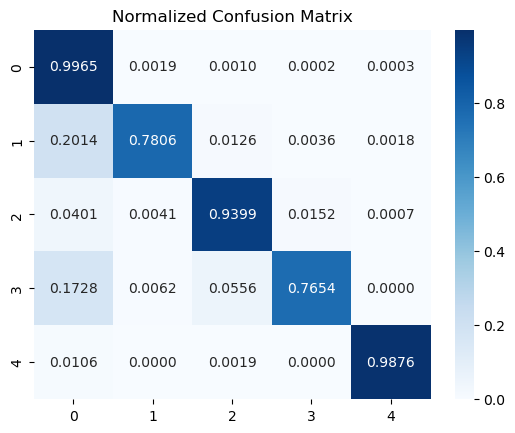

In [2]:
# Kich ban 1: Default hyperparameters
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Load the train and test datasets using Pandas
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

# Split the train and test datasets into X and y
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Reshape the input data for 1D-CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the 1D-CNN model with default hyperparameters
model = Sequential()
model.add(Conv1D(32, 5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test dataset
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

print('1D-CNN Test Results:')
print(classification_report(y_test, y_test_pred))
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Map labels to their corresponding values
label_map = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
label_names = [label_map[i] for i in range(len(label_map))]

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print('Normalized Confusion Matrix:')
print(normalized_cm)

sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.4f')
plt.title('Normalized Confusion Matrix')
colorbar = plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.show()
